In [41]:
# Originally from https://github.com/Ben93kie/SeaDronesSee/blob/main/utils/jsonTotxt.py
import json
import os
from pathlib import Path
import time

def extract_height_from_cocojson(annotation_file="./", output_path="./"):
    categories = {"0":"ignored", "1":"swimmer", "2":"boat","3":"jetski","4":"life_saving_appliances","5":"buoy"}

    scriptTime = time.time()

    with open(annotation_file) as f:
        file = json.load(f)
        
    Path(output_path).mkdir(parents=True, exist_ok=True)

    for img in file['images']:
    # for img in file['images'][-5:]:         #only first/last n for testing
        img_file_name = str(img['id']) + ".jpg"
        # img_file_name = img['file_name']
        altitude = None
        for key in ['altitude', 'height_above_takeoff(meter)', 'null']:
            if img.get('meta') and key in img['meta']:
                altitude = img['meta'][key]
                break
        # height = img['meta']['height_above_takeoff(meter)']
        if altitude is not None:
            filename = f"{img_file_name}_altitude.txt"
            with open(os.path.join(output_path , filename), 'w') as f:
                f.write(str(altitude))

    scriptRunTime = time.time() - scriptTime
    print('\nScript run time in seconds:',scriptRunTime)


In [8]:
import json
import os
from pathlib import Path
import time

def extract_height_from_cocojson_with_null(annotation_file="./", output_path="./"):
    categories = {"0":"ignored", "1":"swimmer", "2":"boat","3":"jetski","4":"life_saving_appliances","5":"buoy"}

    scriptTime = time.time()

    with open(annotation_file) as f:
        file = json.load(f)
        
    Path(output_path).mkdir(parents=True, exist_ok=True)

    for img in file['images']:
    # for img in file['images'][-5:]:         #only first/last n for testing
        img_file_name = str(img['id']) + ".jpg"
        # img_file_name = img['file_name']
        altitude = None
        for key in ['altitude', 'height_above_takeoff(meter)', 'null']:
            if img.get('meta') and key in img['meta']:
                altitude = img['meta'][key]
                break
        # height = img['meta']['height_above_takeoff(meter)']
        if altitude is None:
            altitude = -1.0
        if altitude is not None:
            filename = f"{img_file_name}_altitude.txt"
            with open(os.path.join(output_path , filename), 'w') as f:
                f.write(str(altitude))

    scriptRunTime = time.time() - scriptTime
    print('\nScript run time in seconds:',scriptRunTime)

In [22]:
# extract_height_from_cocojson('datasets/SeaDronesSee-ODV2_yolo/valid/instances_val.json', 'datasets/SeaDronesSee-ODV2_yolo/valid/altitude')


Script run time in seconds: 4.820542335510254


In [23]:
# extract_height_from_cocojson('datasets/SeaDronesSee-ODV2_yolo/train/instances_train.json', 'datasets/SeaDronesSee-ODV2_yolo/train/altitude')


Script run time in seconds: 27.192679166793823


In [29]:
# extract_height_from_cocojson('datasets/SeaDronesSee-ODV2_yolo/instances_test_nogt.json', 'datasets/SeaDronesSee-ODV2_yolo/test/altitude')


Script run time in seconds: 11.679486513137817


In [9]:
extract_height_from_cocojson_with_null('datasets/SeaDronesSee-ODV2_yolo/valid/instances_val.json', 'all_altitudes')


Script run time in seconds: 3.9437780380249023


In [10]:
extract_height_from_cocojson_with_null('datasets/SeaDronesSee-ODV2_yolo/train/instances_train.json', 'all_altitudes')


Script run time in seconds: 19.52344250679016


In [ ]:
from PIL import Image
import os, sys
import glob

root_dir = "datasets/rebalanced_2x2_train-val-OGtest.yolov5/test/images/"


for filename in glob.iglob(root_dir + '*.jpg', recursive=True):
    f, e = os.path.splitext(filename)
    print(f)
    # im = Image.open(filename)
    # imResize = im.resize((28,28), Image.ANTIALIAS)
    # imResize.save(filename , 'JPEG', quality=100)

In [14]:
def read_first_line(file):
    with open(file, 'rt') as fd:
        first_line = fd.readline()
    return first_line

In [ ]:
alt_path = "datasets/rebalanced_2x2_train-val-OGtest.yolov5/test/all_altitude_train_val/"

In [4]:
import os

direc = "all_altitudes_train_val" # Get current working directory
ext = '.txt' # Select your file delimiter

file_dict = {} # Create an empty dict

# Select only files with the ext extension
txt_files = [i for i in os.listdir(direc) if os.path.splitext(i)[1] == ext]
txt_files
# Iterate over your txt files
for f in txt_files:
    # Open them and assign them to file_dict
    with open(os.path.join(direc,f)) as file_object:
        file_dict[f] = int(float(file_object.read()))

# Iterate over your dict and print the key/val pairs.

print (file_dict[:5])

100.jpg_altitude.txt 230
1000.jpg_altitude.txt -1
1002.jpg_altitude.txt -1
1003.jpg_altitude.txt -1
1004.jpg_altitude.txt -1
1009.jpg_altitude.txt -1
101.jpg_altitude.txt 229
1011.jpg_altitude.txt -1
10119.jpg_altitude.txt 9
10120.jpg_altitude.txt 9
10121.jpg_altitude.txt 9
10122.jpg_altitude.txt 9
10123.jpg_altitude.txt 9
10124.jpg_altitude.txt 9
10125.jpg_altitude.txt 9
10126.jpg_altitude.txt 9
10127.jpg_altitude.txt 9
10128.jpg_altitude.txt 9
10129.jpg_altitude.txt 9
1013.jpg_altitude.txt -1
10130.jpg_altitude.txt 9
10131.jpg_altitude.txt 9
10132.jpg_altitude.txt 9
10133.jpg_altitude.txt 9
10134.jpg_altitude.txt 9
10135.jpg_altitude.txt 9
10136.jpg_altitude.txt 9
10137.jpg_altitude.txt 9
10138.jpg_altitude.txt 9
10139.jpg_altitude.txt 9
1014.jpg_altitude.txt -1
10140.jpg_altitude.txt 9
10141.jpg_altitude.txt 9
10142.jpg_altitude.txt 9
10143.jpg_altitude.txt 9
10144.jpg_altitude.txt 9
10145.jpg_altitude.txt 9
10146.jpg_altitude.txt 9
10147.jpg_altitude.txt 9
10148.jpg_altitude.txt 9


In [8]:
import pickle 
with open('all_altitude_inc_null.pkl', 'wb') as f:
    pickle.dump(file_dict, f)

## load all altitude labels

In [10]:
import pickle


with open('datasets/rebalanced_2x2_train-val-OGtest.yolov5/test/all_alt.pkl', 'rb') as f:
    alt_dict = pickle.load(f)
with open('all_altitude_inc_null.pkl', 'rb') as f:
    alt_dict2 = pickle.load(f)


print(alt_dict)
print(len(alt_dict))    
print(alt_dict2)
print(len(alt_dict2))


{'100_jpg': 230, '101_jpg': 229, '10119_jpg': 9, '10120_jpg': 9, '10121_jpg': 9, '10122_jpg': 9, '10123_jpg': 9, '10124_jpg': 9, '10125_jpg': 9, '10126_jpg': 9, '10127_jpg': 9, '10128_jpg': 9, '10129_jpg': 9, '10130_jpg': 9, '10131_jpg': 9, '10132_jpg': 9, '10133_jpg': 9, '10134_jpg': 9, '10135_jpg': 9, '10136_jpg': 9, '10137_jpg': 9, '10138_jpg': 9, '10139_jpg': 9, '10140_jpg': 9, '10141_jpg': 9, '10142_jpg': 9, '10143_jpg': 9, '10144_jpg': 9, '10145_jpg': 9, '10146_jpg': 9, '10147_jpg': 9, '10148_jpg': 9, '10149_jpg': 9, '10150_jpg': 9, '10151_jpg': 9, '10152_jpg': 9, '10153_jpg': 9, '10154_jpg': 9, '10155_jpg': 9, '10156_jpg': 9, '10157_jpg': 9, '10158_jpg': 9, '10159_jpg': 9, '10160_jpg': 9, '10161_jpg': 9, '10162_jpg': 9, '10163_jpg': 9, '10164_jpg': 9, '10165_jpg': 9, '10166_jpg': 9, '10167_jpg': 9, '10168_jpg': 9, '10169_jpg': 9, '10170_jpg': 9, '10171_jpg': 9, '10172_jpg': 9, '10173_jpg': 9, '10174_jpg': 9, '10175_jpg': 9, '10176_jpg': 9, '10177_jpg': 9, '10178_jpg': 9, '10179_

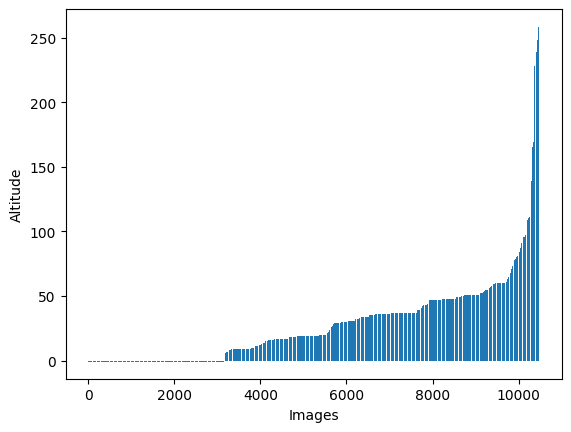

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

values = list(alt_dict2.values())
values.sort()
plt.bar(range(len(alt_dict2)), values)
plt.ylabel('Altitude')
plt.xlabel('Images')

plt.savefig('SDSV2_altitudes2.png', dpi=600)
plt.show()

## altitude barplot

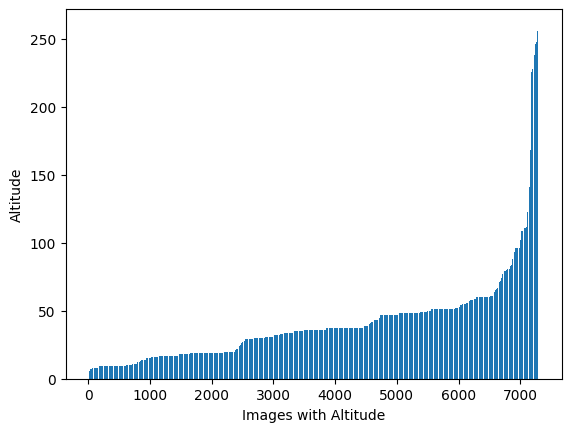

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt
# annotation_file = "train_val_OG_merged.json"
# with open(annotation_file) as f:
#     file = json.load(f)

# file['images']["100_jpg"]
values = list(alt_dict.values())
values.sort()
plt.bar(range(len(alt_dict)), values)
plt.ylabel('Altitude')
plt.xlabel('Images with Altitude')

plt.savefig('SDSV2_altitudes.png', dpi=600)
plt.show()

In [115]:
import pandas as pd
import numpy as np

df = pd.DataFrame({'x': values})

bins = [0,50,150,250]
group_names=['0-50m','50-150','150-250']
df['Altitude Range']=pd.cut(df['x'],bins,labels=group_names)


df

,x,Altitude Range
0,4,0-50m
1,4,0-50m
2,5,0-50m
3,5,0-50m
4,5,0-50m
...,...,...
7300,259,NaN
7301,259,NaN
7302,259,NaN
7303,259,NaN


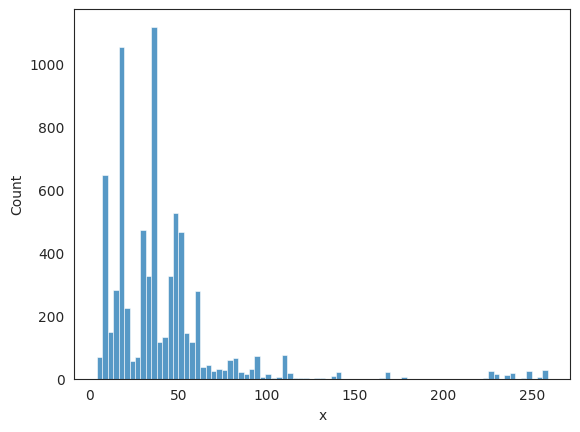

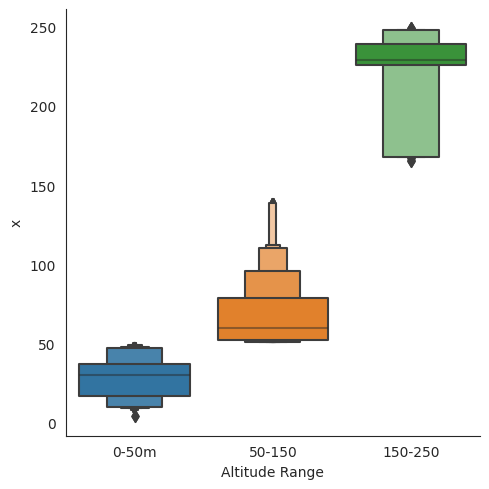

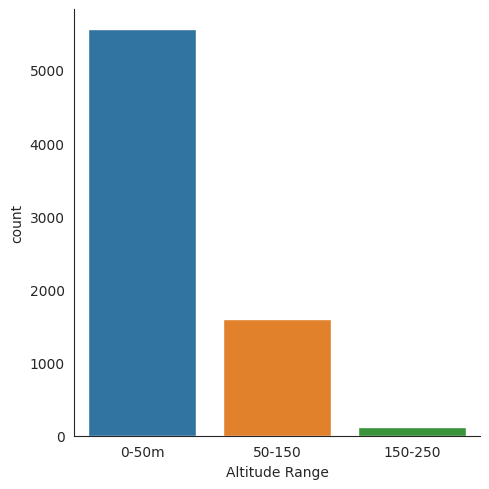

In [118]:
sns.histplot(data=df, x='x' )
sns.catplot(data=df, kind="boxen", x="Altitude Range", y="x", errorbar="sd")
sns.catplot(data=df, x="Altitude Range",kind="count")

In [93]:
from PIL import Image, ImageOps

annotation_file="datasets/rebalanced_2x2_train-val-OGtest.yolov5/test/test_annotations.coco.json"
output_path="datasets/rebalanced_2x2_train-val-OGtest.yolov5/test/test_altaware_resized/"
image_path = "datasets/rebalanced_2x2_train-val-OGtest.yolov5/test/images/"


# scriptTime = time.time()

with open(annotation_file) as f:
    file = json.load(f)
    
Path(output_path).mkdir(parents=True, exist_ok=True)

for img in file['images'][:]:
    
    # print(img)
    
    img_file_name = img['file_name']
    img_file_key = img_file_name.partition(".rf")[0]
    
    img_h = img['height']
    img_w = img['width']
    
    altitude = None
    
    if img_file_key in alt_dict:
        altitude = alt_dict[img_file_key]
    else:
        
        pass
    
    print(f"{img['id']} : {img_file_name}:  {altitude}, {img_w}x{img_h}" )
    
    if altitude is None:
        if img_h > 3000:
            # trinity high alt 6k images assume high alt
            if img_h>img_w:
                # portrait images
                img_h = 3712
                img_w = 2470
            else:
                img_h = 2470
                img_w = 3712
                
       # dynamic scaling     
    else:
        if img_w < 1300:
            # trinity multi spectral images
            if altitude<50:
                # portrait images
                img_h = 480
                img_w = 640
            elif altitude<150:
                img_h = 864
                img_w = 1152
            else:
                img_h = 1248
                img_w = 1664
                
        
        if img_w ==3840:
            # dji mavic rgb images
            if altitude<50:
                # portrait images
                img_w = 640
                img_h = 360
            elif altitude<90:
                img_w = 1152
                img_h = 648
                
            elif altitude<110:
                img_w = 1664
                img_h = 936
                
            elif altitude<130:
                img_w = 2176
                img_h = 1224
                
            elif altitude<150:
                img_w = 2688
                img_h = 1512
            
    im = Image.open(os.path.join(image_path , img_file_name))
    imResize = im.resize((img_w,img_h), Image.NEAREST )   #Image.ANTIALIAS
    
    imResize.save(os.path.join(output_path , img_file_name) , 'JPEG', quality=100)
        


# scriptRunTime = time.time() - scriptTime
# print('\nScript run time in seconds:',scriptRunTime)

0 : 720_jpg.rf.02c3e7d8efe27aa4fdc399c98804aec7.jpg:  109, 1229x932
1 : 552_jpg.rf.03dd780a80de0bc2dd2db0f80b16e3c8.jpg:  110, 1231x934
2 : 8434_jpg.rf.0412eb6ea456f06b8af036514e3c70dd.jpg:  32, 3840x2160
3 : 727_jpg.rf.0427ba45dcf50e90d9e9594c3d493a42.jpg:  111, 1231x932
4 : 804_jpg.rf.045578339d33b51e4f23c1f4e07cae10.jpg:  81, 1230x932
5 : 740_jpg.rf.04614369bf53b9877468090a70c719a9.jpg:  55, 1232x934
6 : 7419_jpg.rf.03504da886da17fed5a2a7007dd4847e.jpg:  51, 3840x2160
7 : 8390_jpg.rf.03ae197e649cd2d9248ea9ded11fa840.jpg:  32, 3840x2160
8 : 8299_jpg.rf.03dc1e0022aca4ecb86ff21ff29ae623.jpg:  47, 3840x2160
9 : 833_jpg.rf.04942e45cda991c48f2ba6f59464be5f.jpg:  109, 1230x933
10 : 3658_jpg.rf.04dd4b7f02e34d54437d4eeb3dac0de5.jpg:  40, 3840x2160
11 : 8337_jpg.rf.04feb4c1d858e8c2a6b526ed6672b13f.jpg:  47, 3840x2160
12 : 8370_jpg.rf.053a738b03622637a2bdf26a23cefbbd.jpg:  47, 3840x2160
13 : 8109_jpg.rf.0495c4c98d5abe15dea3188cb20e6ec6.jpg:  34, 3840x2160
14 : 351_jpg.rf.0629c74c9616c5075797ba

## larger scaling

In [94]:
from PIL import Image, ImageOps

annotation_file="datasets/rebalanced_2x2_train-val-OGtest.yolov5/test/test_annotations.coco.json"
output_path="datasets/rebalanced_2x2_train-val-OGtest.yolov5/test/test_altaware_resized2/"
image_path = "datasets/rebalanced_2x2_train-val-OGtest.yolov5/test/images/"


# scriptTime = time.time()

with open(annotation_file) as f:
    file = json.load(f)
    
Path(output_path).mkdir(parents=True, exist_ok=True)

for img in file['images'][:]:
    
    # print(img)
    
    img_file_name = img['file_name']
    img_file_key = img_file_name.partition(".rf")[0]
    
    img_h = img['height']
    img_w = img['width']
    
    altitude = None
    
    if img_file_key in alt_dict:
        altitude = alt_dict[img_file_key]
    else:
        
        pass
    
    print(f"{img['id']} : {img_file_name}:  {altitude}, {img_w}x{img_h}" )
    
    if altitude is None:
        if img_h > 3000:
            # trinity high alt 6k images assume high alt
            if img_h>img_w:
                # portrait images
                img_h = 4224
                img_w = 2816
            else:
                img_h = 2816
                img_w = 4224
                
       # dynamic scaling     
    else:
        if img_w < 1300:
            # trinity multi spectral images
            if altitude<150:
                img_h = 864
                img_w = 1152
            else:
                img_h = 1248
                img_w = 1664
                
        
        if img_w ==3840:
            # dji mavic rgb images
            if altitude<30:
                # portrait images
                img_w = 640
                img_h = 360
            elif altitude<60:
                img_w = 1152
                img_h = 648
                
            elif altitude<90:
                img_w = 1664
                img_h = 936
                
            elif altitude<120:
                img_w = 2176
                img_h = 1224
                
            elif altitude<150:
                img_w = 2688
                img_h = 1512
            
    im = Image.open(os.path.join(image_path , img_file_name))
    imResize = im.resize((img_w,img_h), Image.NEAREST )   #Image.ANTIALIAS
    
    imResize.save(os.path.join(output_path , img_file_name) , 'JPEG', quality=100)
        


# scriptRunTime = time.time() - scriptTime
# print('\nScript run time in seconds:',scriptRunTime)

0 : 720_jpg.rf.02c3e7d8efe27aa4fdc399c98804aec7.jpg:  109, 1229x932
1 : 552_jpg.rf.03dd780a80de0bc2dd2db0f80b16e3c8.jpg:  110, 1231x934
2 : 8434_jpg.rf.0412eb6ea456f06b8af036514e3c70dd.jpg:  32, 3840x2160
3 : 727_jpg.rf.0427ba45dcf50e90d9e9594c3d493a42.jpg:  111, 1231x932
4 : 804_jpg.rf.045578339d33b51e4f23c1f4e07cae10.jpg:  81, 1230x932
5 : 740_jpg.rf.04614369bf53b9877468090a70c719a9.jpg:  55, 1232x934
6 : 7419_jpg.rf.03504da886da17fed5a2a7007dd4847e.jpg:  51, 3840x2160
7 : 8390_jpg.rf.03ae197e649cd2d9248ea9ded11fa840.jpg:  32, 3840x2160
8 : 8299_jpg.rf.03dc1e0022aca4ecb86ff21ff29ae623.jpg:  47, 3840x2160
9 : 833_jpg.rf.04942e45cda991c48f2ba6f59464be5f.jpg:  109, 1230x933
10 : 3658_jpg.rf.04dd4b7f02e34d54437d4eeb3dac0de5.jpg:  40, 3840x2160
11 : 8337_jpg.rf.04feb4c1d858e8c2a6b526ed6672b13f.jpg:  47, 3840x2160
12 : 8370_jpg.rf.053a738b03622637a2bdf26a23cefbbd.jpg:  47, 3840x2160
13 : 8109_jpg.rf.0495c4c98d5abe15dea3188cb20e6ec6.jpg:  34, 3840x2160
14 : 351_jpg.rf.0629c74c9616c5075797ba